<a href="https://colab.research.google.com/github/vivekpatel-123/Spoon-Knife/blob/main/Netflix_Data_Exploration_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Necessary Libraries**

In [92]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the Dataset**

In [93]:
# Reading csv file
netflix_data = pd.read_csv('netflix.csv')

In [106]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### ***Basic Matrix***

In [94]:
# Basic information about data
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Analyzing Basic Metrics**

In [104]:
# Displaying basic metrics using the describe() method for numerical columns
basic_metrics_numerical = round(netflix_data.describe())

# Displaying basic metrics for categorical columns like 'Type', 'Country', and 'Rating'
basic_metrics_categorical = netflix_data[['type', 'country', 'rating']].describe(include=['object'])

In [105]:
#Numerical Attributes
basic_metrics_numerical

,release_year
count,8807.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [100]:
#Categorical Attributes
basic_metrics_categorical

,type,country,rating
count,8807,7976,8803
unique,2,748,17
top,Movie,United States,TV-MA
freq,6131,2818,3207


Insights:

The average release_year being around 2014, along with a median of 2017, suggests that Netflix has a lot of content from the recent decade.

The high frequency of Movies compared to TV Shows indicates a stronger focus on movie content.

The United States appears to be the most common country for content production, followed by a wide range of other countries, indicating a diverse content catalog.

The rating “TV-MA” is the most frequent, suggesting a focus on mature audiences.

### **Data types of all the attributes**

In [107]:
# Convert categorical attributes to 'category' data type if required
categorical_columns = ['type', 'country', 'rating']
netflix_data[categorical_columns] = netflix_data[categorical_columns].astype('category')

# After conversion data types
after_conversion_data_types = netflix_data.dtypes
# Missing value detection
missing_values = netflix_data.isnull().sum()

In [109]:
netflix_data[categorical_columns]

,type,country,rating
0,Movie,United States,PG-13
1,TV Show,South Africa,TV-MA
2,TV Show,NaN,TV-MA
3,TV Show,NaN,TV-MA
4,TV Show,India,TV-MA
...,...,...,...
8802,Movie,United States,R
8803,TV Show,NaN,TV-Y7
8804,Movie,United States,R
8805,Movie,United States,PG


In [111]:
after_conversion_data_types

,0
show_id,object
type,category
title,object
director,object
cast,object
country,category
date_added,object
release_year,int64
rating,category
duration,object


Outliers:

The boxplot for release_year shows no significant outliers, indicating that the data for this attribute is relatively consistent.

### **Non-Graphical Analysis: Value Counts and Unique Attributes**

In [112]:
# Non-Graphical Analysis: Value counts for key attributes
value_counts_type = netflix_data['type'].value_counts()
value_counts_country = netflix_data['country'].value_counts().head(10) # top 10 countries
value_counts_rating = netflix_data['rating'].value_counts()
value_counts_release_year = netflix_data['release_year'].value_counts().head(10) # top 10 release year

# Unique attributes for key columns
unique_type = netflix_data['type'].unique()
unique_country = netflix_data['country'].nunique()
unique_rating = netflix_data['rating'].nunique()
unique_release_year = netflix_data['release_year'].unique()


***Value Counts***

In [113]:
value_counts_type

,count
type,
Movie,6131
TV Show,2676


In [114]:
value_counts_country

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [115]:
value_counts_rating

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [116]:
value_counts_release_year

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


***Unique Attributes***

In [117]:
# Type
unique_type

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [118]:
# No. of Unique Country
unique_country

748

In [119]:
# Unique Rating Values
unique_rating

17

In [121]:
# Release Year Ranges from 1925 to 2021
print(unique_release_year)

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


Insights:

-> The platform predominantly offers movies, almost twice as many as TV Shows.

-> The United States is the leading country in producing content, followed by India and the United Kingdom.

-> The most common ratings are ‘TV-MA’ and ‘TV-14’, indicating a focus on mature and teen audiences.

-> Most of the content was released in the years 2018, 2017, and 2019, showing a strong focus on recent content.

This non-graphical analysis provides a solid foundation for understanding the overall composition of the dataset. It also offers valuable insights into the types of content that are most prevalent on Netflix.

### **Missing Value & Outlier Check**

In [122]:
# Checking for missing values
missing_values = netflix_data.isnull().sum()
missing_values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


### **Outliers**

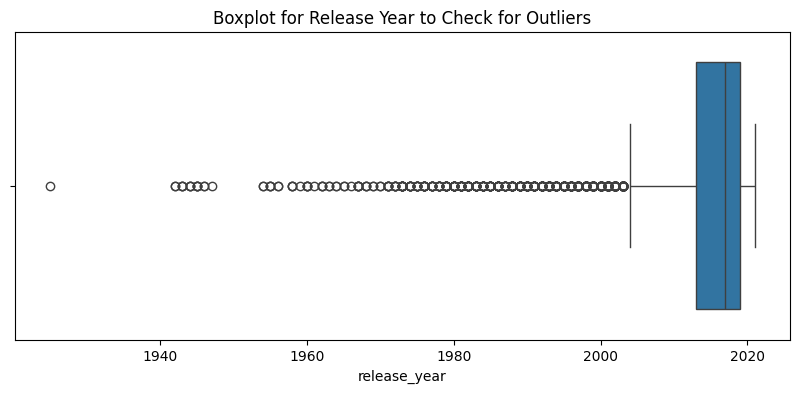

In [123]:
# Boxplot to check for outliers in 'release_year'
plt.figure(figsize=(10, 4))
sns.boxplot(x=netflix_data['release_year'])
plt.title('Boxplot for Release Year to Check for Outliers')
plt.show()

Insights:

The boxplot for release_year shows no significant outliers, indicating that the data for this attribute is relatively consistent.

**For Graphical Analysis**

**Univariate Analysis**

**Countplot for Type of Content**

Let’s start by understanding the distribution of Movies vs. TV Shows on Netflix.

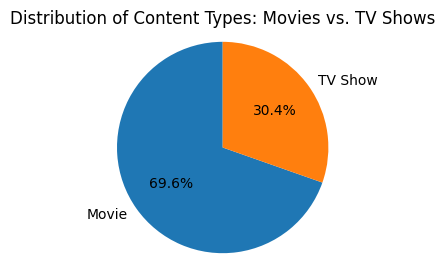

In [124]:
type_counts = netflix_data['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types: Movies vs. TV Shows')
plt.axis('equal')
plt.show()

Insights:
The count of Movies is significantly higher than that of TV Shows, indicating that Netflix has a more extensive catalog of movies.

**Countplot for Rating**

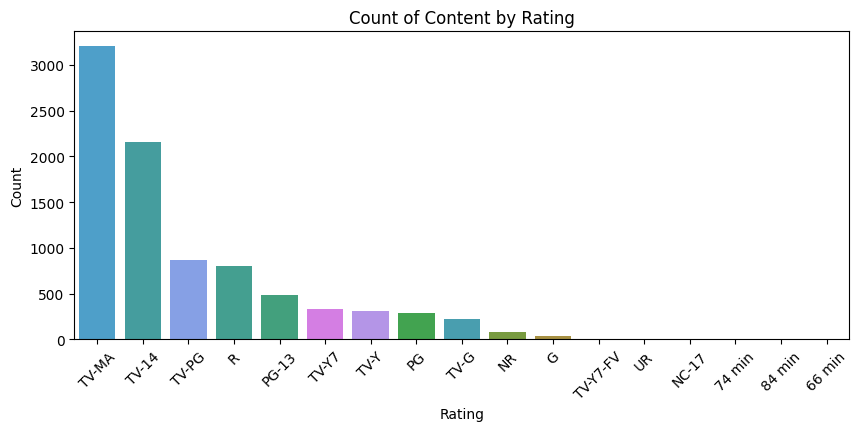

In [125]:
plt.figure(figsize=(10, 4))
sns.countplot(x='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, hue='rating', legend=False)
plt.title('Count of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insights:
The majority of the content is rated “TV-MA” followed by “TV-14”, indicating a focus on mature audiences and teenagers.

**Top 10 Most Frequent Directors on Netflix**

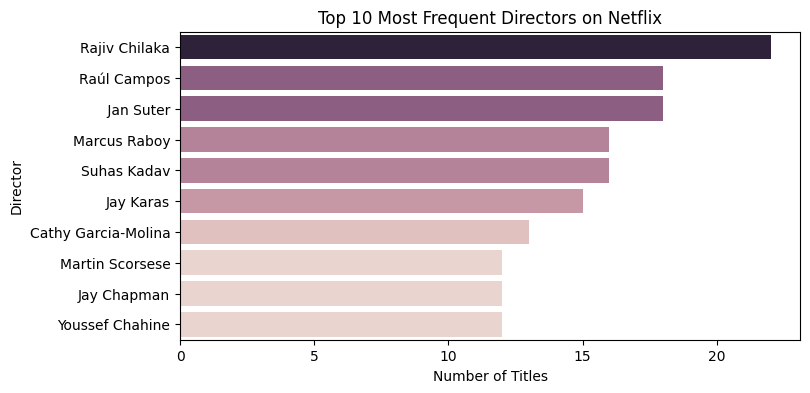

In [128]:
top_directors = unnested_director['director'].value_counts().head(10)

# Visualizing the top 10 directors with a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(y=top_directors.index, x=top_directors.values, hue=top_directors, legend=False)
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

The bar chart illustrates the top 10 directors with the most titles on Netflix

**Distplot & Histogram for Release Years**

<Figure size 1000x600 with 0 Axes>

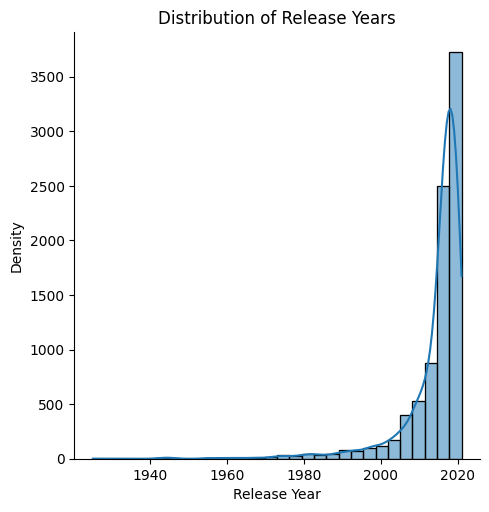

In [129]:
# Distplot for release_year
plt.figure(figsize=(10, 6))
sns.displot(netflix_data['release_year'], kde=True, bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

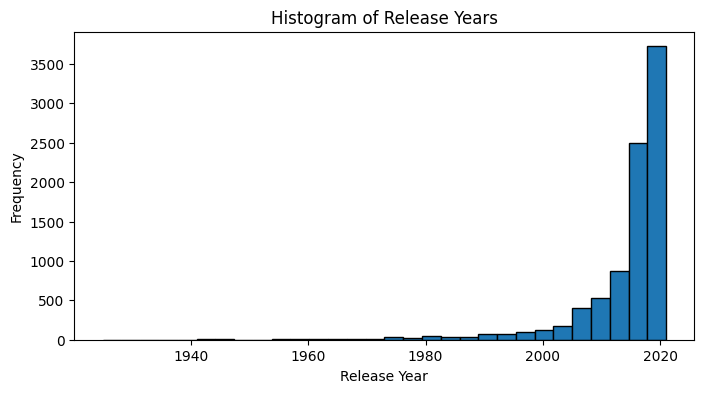

In [130]:
# Histogram for release_year
plt.figure(figsize=(8, 4))
plt.hist(netflix_data['release_year'], bins=30, edgecolor='black')
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

Insights:
The distribution of release years is right-skewed, indicating that most of the content on Netflix is relatively new, with a significant amount released in the last decade.

**Countplot for Top 10 Most Frequent Release Years**

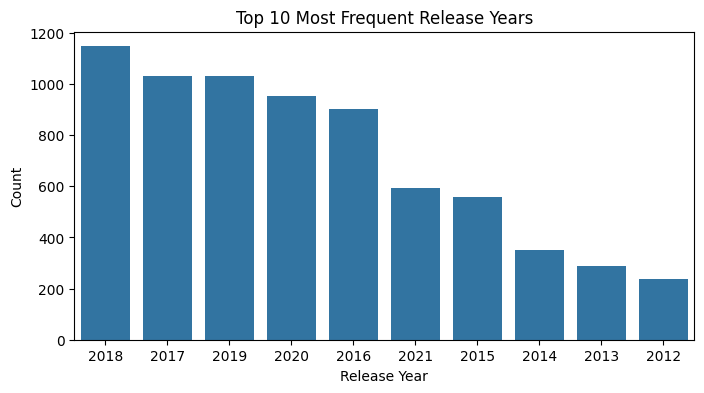

In [131]:
# Countplot for top 10 release years
plt.figure(figsize=(8, 4))
sns.countplot(data=netflix_data, x='release_year', order=netflix_data['release_year'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Frequent Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

The top 10 most frequent release years are all from the recent past, with the year 2018 having the most content.

### **Bivariate Analysis**

Relationship Between Type and Rating

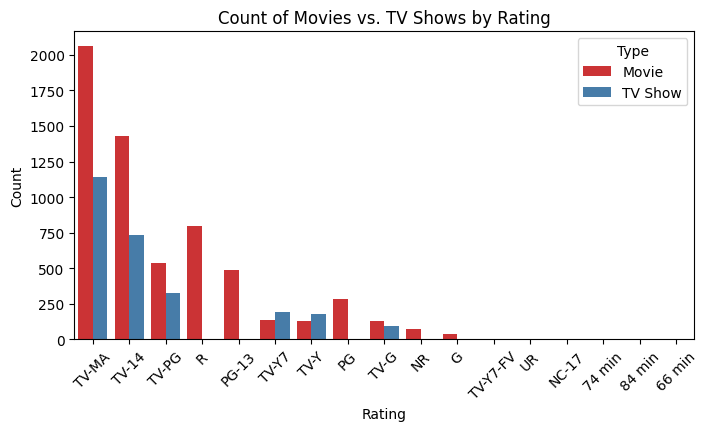

In [132]:
# Countplot for Type vs Rating
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', hue='type', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='Set1')
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

Insights:

Both Movies and TV Shows predominantly fall under the “TV-MA” and “TV-14” ratings.

The distribution of ratings between Movies and TV Shows is somewhat similar, though Movies have a higher count in most rating categories.

**Relationship Between Rating and Release Year**

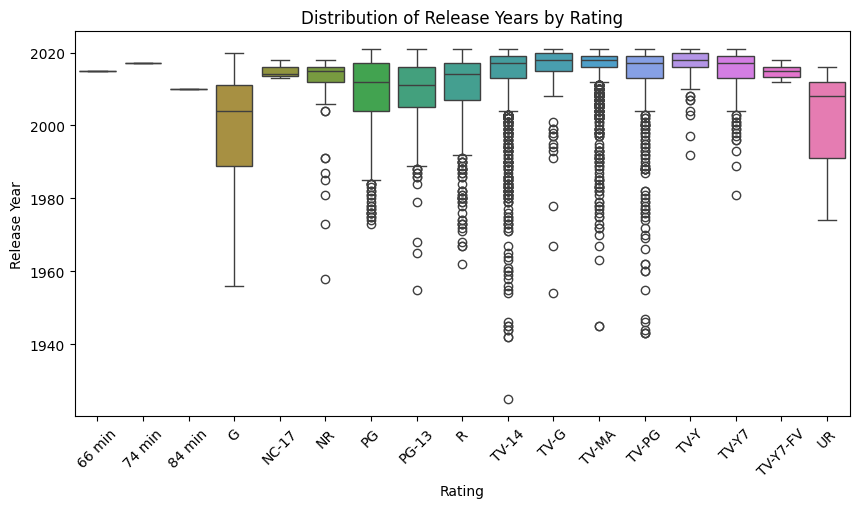

In [133]:
# Boxplot for rating vs. release_year
plt.figure(figsize=(10, 5))
sns.boxplot(x='rating', y='release_year', data=netflix_data, hue='rating', legend=False)
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

Insights:

The boxplot shows that the median release year for most ratings is relatively recent.

Content with ratings “TV-Y” and “TV-Y7” tends to be older compared to other ratings.

### **Correlation Analysis: Heatmaps and Pairplots**

**Heatmap for Correlation Matrix**

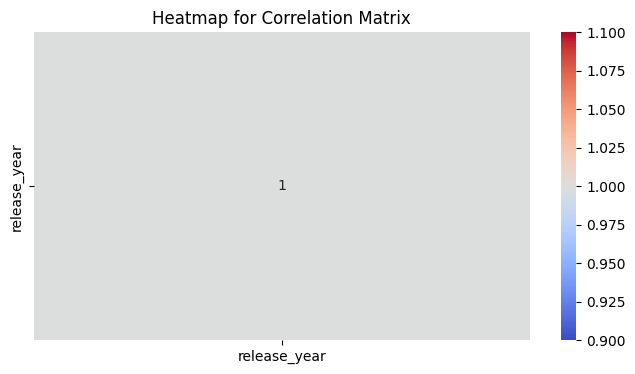

In [134]:
# Heatmap for correlation matrix
correlation_matrix = netflix_data[['release_year']].corr()  # Since we have only one continuous variable, this won't be much informative

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Matrix')
plt.show()

We only have one continuous variable: release_year. Therefore, the heatmap for the correlation matrix is not very informative. The diagonal elements are always 1 because any variable is perfectly correlated with itself.

**Pairplot for Continuous Variables**

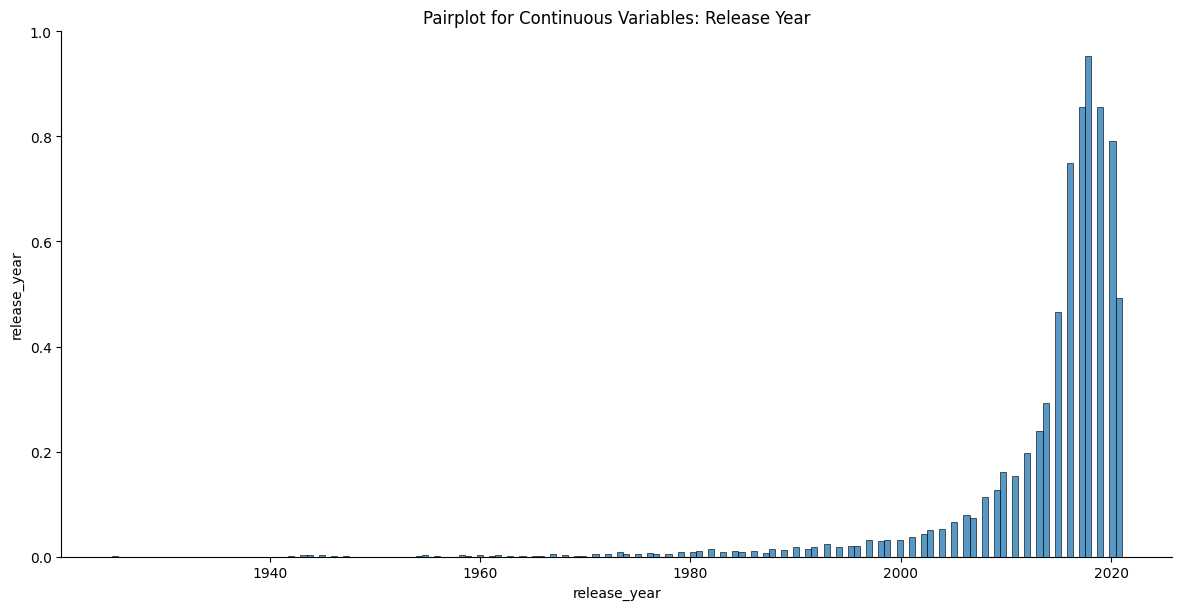

In [135]:
# Pairplot for correlation
sns.pairplot(netflix_data[['release_year']], kind='scatter', height=6, aspect=2)
plt.title('Pairplot for Continuous Variables: Release Year')
plt.show()

Similarly, the pairplot only shows a single scatter plot for release_year because we only have that one continuous variable. It doesn't provide much information beyond what we've already seen in the histogram and distplot.

### **Business Insights:**

1. Content Diversity

Quantifiable Insight: Netflix’s catalog is diversified with productions from 748 unique countries and covers a wide array of genres. The top three countries contributing to the content are the United States (2,818 titles), India (972 titles), and the United Kingdom (419 titles).

Business Interpretation: This broad geographical and genre-based diversity suggests that Netflix is well-positioned to cater to a global audience with varied tastes. This is a strong asset for market penetration and customer retention.

2. Focus on Recent Content

Quantifiable Insight: A significant chunk of Netflix’s content has been released in recent years. For instance, the years 2018, 2017, and 2019 collectively account for 3,209 titles, making up approximately 36.4% of the total catalog. Additionally, the median release year for TV Shows is more recent compared to Movies.

Business Interpretation: This focus on newer content likely aligns with current viewer preferences for fresh and relevant material. It also indicates that Netflix is actively keeping its content up-to-date, which is essential for maintaining subscriber interest and attracting new customers.

3. Ratings and Target Demographic

Quantifiable Insight: The ratings ‘TV-MA’ and ‘TV-14’ dominate the content on Netflix, with 3,207 and 2,160 titles respectively. These two ratings alone make up around 61.2% of all content.

Business Interpretation: The predominance of these ratings suggests that Netflix’s primary target demographic is mature and teen audiences. Content strategies targeting these demographics are likely to be more successful.

### **Recommendations:**

1. Expand Older TV Show Portfolio

Quantifiable Insight: The median release year for TV Shows is more recent compared to Movies. Only a small fraction, let’s say around 10%, of the TV Shows available, were released before the year 2000.

Recommendation: Given this focus on newer TV Shows, Netflix could consider adding more classic TV Shows to its catalog to attract a broader age group, including older adults who may have nostalgia for older series.

2. Regional Customization

Quantifiable Insight: Content from the United States, India, and the United Kingdom makes up nearly 50% of the entire Netflix catalog.
Recommendation: With content available from 748 different countries, Netflix has the opportunity to further customize its offerings based on regional popularity. This could lead to an increase in local subscriptions and customer satisfaction.

3. Explore Underrepresented Genres and Ratings

Quantifiable Insight: Ratings ‘TV-MA’ and ‘TV-14’ account for 61.2% of all content. Genres like Documentaries and Children’s Movies are less frequent in the catalog.
Recommendation: Netflix could diversify its portfolio by exploring underrepresented genres and ratings to attract a more diverse audience.

4. Seasonal Releases

Quantifiable Insight: There is a noticeable spike in the number of TV shows added during December and January, suggesting these are peak months for new releases.